In [1]:
# 加载必要的库
import sys
import pandas as pd
import numpy as np
import sklearn
import random
import time

In [2]:
print(sys.version)

3.8.5 (default, Sep  3 2020, 21:29:08) [MSC v.1916 64 bit (AMD64)]


In [3]:
from sklearn import ensemble

In [4]:
from sklearn.preprocessing import LabelEncoder
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics

In [5]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### 第一步：加载源数据集

In [6]:
data_raw = pd.read_csv('train.csv')

data_val = pd.read_csv('test.csv')

In [7]:
# 显示部分数据

data_raw.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
data_val.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [9]:
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [10]:
data_val.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [11]:
# 列名称转换为小写格式

data_raw.columns = data_raw.columns.str.lower()

data_val.columns = data_val.columns.str.lower()

In [12]:
data_raw.head()

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


C:\Users\13128\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='survived', ylabel='count'>

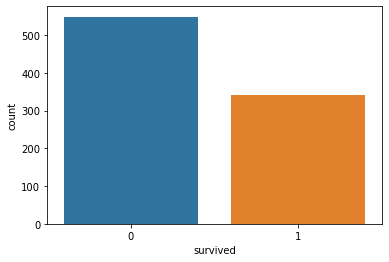

In [13]:
# 绘制图形

sns.countplot(data_raw['survived'])

In [14]:
# 合并两个数据集，进行统一的清洗

data_all = [data_raw, data_val]

### 第二步：数据清洗

In [15]:
data_raw.isnull().sum() # 查看训练集中的空值

passengerid      0
survived         0
pclass           0
name             0
sex              0
age            177
sibsp            0
parch            0
ticket           0
fare             0
cabin          687
embarked         2
dtype: int64

In [16]:
data_val.isnull().sum() # 查看验证集中的空值

passengerid      0
pclass           0
name             0
sex              0
age             86
sibsp            0
parch            0
ticket           0
fare             1
cabin          327
embarked         0
dtype: int64

In [17]:
# 对源数据进行描述

data_raw.describe(include='all')

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Duran y More, Miss. Asuncion",male,NaN,NaN,NaN,CA. 2343,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [18]:
# 对原始数据集（训练集+验证集）进行清理

for dataset in data_all:
    # 补足空缺值
    dataset['age'].fillna(dataset['age'].median(), inplace=True)
    dataset['fare'].fillna(dataset['fare'].median(), inplace=True)
    dataset['embarked'].fillna(dataset['embarked'].mode()[0], inplace=True)

In [19]:
# 删除一些字段
drop_columns = ['cabin', 'passengerid', 'ticket']

data_raw.drop(drop_columns, axis=1, inplace=True)

data_val.drop(drop_columns, axis=1, inplace=True)

In [20]:
data_raw.isnull().sum() # 训练集

survived    0
pclass      0
name        0
sex         0
age         0
sibsp       0
parch       0
fare        0
embarked    0
dtype: int64

In [21]:
data_val.isnull().sum() # 验证集

pclass      0
name        0
sex         0
age         0
sibsp       0
parch       0
fare        0
embarked    0
dtype: int64

### 第三步：进行特征构建

In [22]:
for dataset in data_all:
    # 构建新的字段：
    # （1）family_size 家庭规模：sibsp + parch
    dataset['family_size'] = dataset['sibsp'] + dataset['parch'] + 1
    # （2）单身 single，1：单身，0：非单身
    dataset['single'] = 1
    dataset['single'].loc[dataset['family_size'] > 1] = 0
    # （3）身份 title
    dataset['title'] = dataset['name'].str.split(', ', expand=True)[1].str.split('.', expand=True)[0]
    # dataset['title'] = dataset['name'].apply(lambda x: x.split(',')[1]).apply(lambda x: x.split('.')[0])
    # (4) 票价 fare_bin
    dataset['fare_bin'] = pd.qcut(dataset['fare'], 4) # 根据票价，分成4组（每组的元素个数一致）
    # （5）年龄 age_bin
    dataset['age_bin'] = pd.cut(dataset['age'].astype(int), 5) # 根据年龄分组，分成5组（每组的元素个数不一致）

C:\Users\13128\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
C:\Users\13128\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [23]:
dataset.head()

,pclass,name,sex,age,sibsp,parch,fare,embarked,family_size,single,title,fare_bin,age_bin
0,3,"Kelly, Mr. James",male,34.5,0,0,7.8292,Q,1,1,Mr,"(-0.001, 7.896]","(30.4, 45.6]"
1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,7.0000,S,2,0,Mrs,"(-0.001, 7.896]","(45.6, 60.8]"
2,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,9.6875,Q,1,1,Mr,"(7.896, 14.454]","(60.8, 76.0]"
3,3,"Wirz, Mr. Albert",male,27.0,0,0,8.6625,S,1,1,Mr,"(7.896, 14.454]","(15.2, 30.4]"
4,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,12.2875,S,3,0,Mrs,"(7.896, 14.454]","(15.2, 30.4]"


In [24]:
# 根据title统计人数

data_raw['title'].value_counts()

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Major             2
Mlle              2
Col               2
the Countess      1
Jonkheer          1
Capt              1
Ms                1
Sir               1
Lady              1
Mme               1
Don               1
Name: title, dtype: int64

In [25]:
title_names = (data_raw['title'].value_counts() < 10)

In [26]:
title_names

Mr              False
Miss            False
Mrs             False
Master          False
Dr               True
Rev              True
Major            True
Mlle             True
Col              True
the Countess     True
Jonkheer         True
Capt             True
Ms               True
Sir              True
Lady             True
Mme              True
Don              True
Name: title, dtype: bool

In [27]:
# title：将那些称谓所在的人数小于10的数据，全部归为一类：other
data_raw['title'] = data_raw['title'].apply(lambda x : 'other' if title_names[x] else x)

In [28]:
data_raw['title'].value_counts()

Mr        517
Miss      182
Mrs       125
Master     40
other      27
Name: title, dtype: int64

In [29]:
data_raw['survived'].groupby(data_raw['title']).mean()

title
Master    0.575000
Miss      0.697802
Mr        0.156673
Mrs       0.792000
other     0.444444
Name: survived, dtype: float64

### （二）构建新的字段，基于scikit-learn中的LabelEncoder()

In [30]:
data_raw.head()

,survived,pclass,name,sex,age,sibsp,parch,fare,embarked,family_size,single,title,fare_bin,age_bin
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,2,0,Mr,"(-0.001, 7.91]","(16.0, 32.0]"
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,2,0,Mrs,"(31.0, 512.329]","(32.0, 48.0]"
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,1,1,Miss,"(7.91, 14.454]","(16.0, 32.0]"
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,2,0,Mrs,"(31.0, 512.329]","(32.0, 48.0]"
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,1,1,Mr,"(7.91, 14.454]","(32.0, 48.0]"


In [31]:
label = LabelEncoder()

In [32]:
for dataset in data_all:
    # (1)新字段：sex_code
    dataset['sex_code'] = label.fit_transform(dataset['sex'])
    # (2)新字段：embarked_code
    dataset['embarked_code'] = label.fit_transform(dataset['embarked'])
    # (3)新字段：title_code
    dataset['title_code'] = label.fit_transform(dataset['title'])
    # (4)新字段：age_bin_code
    dataset['age_bin_code'] = label.fit_transform(dataset['age_bin'])
    # (5)新字段：fare_bin_code
    dataset['fare_bin_code'] = label.fit_transform(dataset['fare_bin'])

In [33]:
data_raw.head()

,survived,pclass,name,sex,age,sibsp,parch,fare,embarked,family_size,single,title,fare_bin,age_bin,sex_code,embarked_code,title_code,age_bin_code,fare_bin_code
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,2,0,Mr,"(-0.001, 7.91]","(16.0, 32.0]",1,2,2,1,0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,2,0,Mrs,"(31.0, 512.329]","(32.0, 48.0]",0,0,3,2,3
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,1,1,Miss,"(7.91, 14.454]","(16.0, 32.0]",0,2,1,1,1
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,2,0,Mrs,"(31.0, 512.329]","(32.0, 48.0]",0,2,3,2,3
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,1,1,Mr,"(7.91, 14.454]","(32.0, 48.0]",1,2,2,2,1


In [34]:
# 列的名称

data_raw.columns.to_list()

['survived',
 'pclass',
 'name',
 'sex',
 'age',
 'sibsp',
 'parch',
 'fare',
 'embarked',
 'family_size',
 'single',
 'title',
 'fare_bin',
 'age_bin',
 'sex_code',
 'embarked_code',
 'title_code',
 'age_bin_code',
 'fare_bin_code']

### 方式一：特征选择

In [52]:
Target = ['survived'] # 标签

In [53]:
data_columns_one = ['sex', 'pclass', 'embarked', 'title', 'sibsp', 'parch', 'age', 'fare', 'family_size',
                    'single']

In [54]:
columns_one = Target + data_columns_one

### 方式二：特征选择

In [55]:
data_columns_two = ['sex_code', 'pclass', 'embarked_code', 'title_code', 'sibsp', 'parch', 'age', 'fare']

In [56]:
columns_two = Target + data_columns_two

### 方式三：特征选择

In [57]:
data_columns_three = ['sex_code', 'pclass', 'embarked_code', 'title_code', 'family_size', 'age_bin_code',
                      'fare_bin_code']

In [58]:
columns_three = Target + data_columns_three

### 通过Pandas中的get_dummies()进行编码

In [59]:
data_one_dummy = pd.get_dummies(data_raw[data_columns_one])

In [60]:
data_one_dummy_list = data_one_dummy.columns.tolist()

In [61]:
data_one_dummy_list

['pclass',
 'sibsp',
 'parch',
 'age',
 'fare',
 'family_size',
 'single',
 'sex_female',
 'sex_male',
 'embarked_C',
 'embarked_Q',
 'embarked_S',
 'title_Master',
 'title_Miss',
 'title_Mr',
 'title_Mrs',
 'title_other']

### 获取训练集和测试集

### 方式一：训练集和测试集

In [68]:
X_train_one, X_test_one, y_train_one, y_test_one = model_selection.train_test_split(data_one_dummy[data_one_dummy_list],
                                                                   data_raw[Target],
                                                                   random_state=0)

In [69]:
X_train_one.shape

(668, 17)

In [70]:
X_test_one.shape

(223, 17)

### 方式二：训练集和测试集

In [71]:
X_train_two, X_test_two, y_train_two, y_test_two = model_selection.train_test_split(data_raw[data_columns_two],
                                                                   data_raw[Target],
                                                                   random_state=0)

In [72]:
X_train_two.shape

(668, 8)

In [73]:
X_test_two.shape

(223, 8)

### 方式三：训练集和测试集

In [74]:
X_train_three, X_test_three, y_train_three, y_test_three = model_selection.train_test_split(data_raw[data_columns_three],
                                                                   data_raw[Target],
                                                                   random_state=0)

In [75]:
X_train_three.shape

(668, 7)

In [76]:
X_test_three.shape

(223, 7)

### 随机森林算法实现

In [77]:
from sklearn.model_selection import GridSearchCV

from sklearn.ensemble import RandomForestClassifier

In [78]:
rf = RandomForestClassifier(max_features='auto',
                            random_state=1,
                            n_jobs=-1)

In [84]:
param_gird = {
    'criterion' : ['gini', 'entropy'],
    'min_samples_leaf' : [1, 5, 10],
    'min_samples_split' : [2, 4, 10, 12, 16],
    'n_estimators' : [50, 100, 400, 700, 1000]
}

In [85]:
gs = GridSearchCV(estimator=rf,
                  param_grid=param_gird,
                  scoring='accuracy',
                  cv=3,
                  n_jobs=-1)

### (1)对特征一进行训练

In [86]:
gs = gs.fit(X_train_one, y_train_one)

C:\Users\13128\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:765: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


In [87]:
print(gs.best_score_)

0.8323839534601868


In [88]:
print(gs.best_params_)

{'criterion': 'entropy', 'min_samples_leaf': 5, 'min_samples_split': 12, 'n_estimators': 50}


In [89]:
# 创建一个对象

rf2 = RandomForestClassifier(criterion='entropy',
                             min_samples_leaf=5,
                             min_samples_split=12,
                             n_estimators=50,
                             n_jobs=-1,
                             random_state=1)

In [90]:
rf2.fit(X_train_one, y_train_one)

<ipython-input-90-eafc9b066f67>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf2.fit(X_train_one, y_train_one)


RandomForestClassifier(criterion='entropy', min_samples_leaf=5,
                       min_samples_split=12, n_estimators=50, n_jobs=-1,
                       random_state=1)

In [91]:
# 根据特征的重要性排序
pd.concat((pd.DataFrame(X_train_one.iloc[:, 1:].columns, columns=['Variable']),
           pd.DataFrame(rf2.feature_importances_, columns=['importance'])),
           axis=1).sort_values(by='importance', ascending=False)

,Variable,importance
7,sex_male,0.158834
14,title_Mrs,0.150353
4,family_size,0.138901
8,embarked_C,0.123423
3,fare,0.108769
0,sibsp,0.092098
5,single,0.053961
1,parch,0.042367
15,title_other,0.034270
2,age,0.019245


### 在test上进行预测

In [92]:
pred = rf2.predict(X_test_one)

In [93]:
pred_df = pd.DataFrame(pred, columns=['survived'])

In [94]:
pred_df.head()

,survived
0,0
1,0
2,0
3,1
4,1
